In [1]:
# Dexription : Stock data Analysis using Stochastic Oscillator indicator, Python & Plotly.

In [29]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 8.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=3cf99a69aef7a5949459408ca830129c75e12685be742a8eb853bff8bd1bdbc4
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [30]:
# Import Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

import plotly.graph_objects as go

In [31]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "SBIN.NS",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "7d",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1m",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = False,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2020-11-19 09:15:00+05:30,247.899994,250.300003,247.199997,249.300003,0
2020-11-19 09:16:00+05:30,249.449997,249.449997,248.449997,248.600006,762932
2020-11-19 09:17:00+05:30,248.600006,248.949997,247.350006,247.500000,824853
2020-11-19 09:18:00+05:30,247.500000,247.500000,247.050003,247.399994,431133
2020-11-19 09:19:00+05:30,247.399994,247.399994,246.699997,247.100006,639054


In [32]:
# Stock Of Single day.
my_stock = data[(data.index > '2020-11-20 09:15:00') & (data.index < '2020-11-20 15:30:00')]
my_stock.head()

,Open,High,Low,Close,Volume
Datetime,,,,,
2020-11-20 09:16:00+05:30,241.649994,242.000000,240.899994,242.000000,958280
2020-11-20 09:17:00+05:30,242.000000,243.399994,242.000000,243.250000,1067650
2020-11-20 09:18:00+05:30,243.300003,243.800003,243.149994,243.300003,824695
2020-11-20 09:19:00+05:30,243.199997,243.399994,242.600006,243.000000,633293
2020-11-20 09:20:00+05:30,243.300003,243.550003,242.300003,242.350006,786563


# **Stochastic Oscillator:**
- **What Is Stochastic Oscillator?**
  - Like RSI & ROC it is Momentum Oscillator. This gives the momentum of OverVought & OverSold of Stocks. By comparing current price of stocks and past price.
  - Value is always bound between 0 & 100
- ** How it actullly Work?
  - I appear as separate charts and it plot two lines.
  - 1st Line it's what we called *%K* indicate as *Blue Line*.
  - 2nd Line it's what we called *%D* indicate as *Red Line*.

## Plot the Stochastic Oscillator Graph.

This **%K** is represented in Mathematical form as:
* %K basic calculation*
<p align="center"> 
<img src="https://static.anychart.com/images/technical_indicators/fastK.png"></p>

Where pK is the first period that is set through the stochastic() method, which is a period for the %K value.

- It is also called Fast %D.

Let's Calculate using Python:

In [33]:
# Calculated %K using Stock Close, High, Low, period.
Close = my_stock['Close']
High = my_stock['High']
Low = my_stock['Low']
n = 3

def STOK(close=Close, low=Low, high=High, n=n): 
 STOK = ((Close - Low.rolling(n).min()) / (High.rolling(n).max() - Low.rolling(n).min())) * 100
 return STOK

* *%D = 3-period SMA of %K*
<p align="center"> 
<img src="https://static.anychart.com/images/technical_indicators/fastD.png"></p>

Where p3 is the third period that is set through the stochastic() method, which is a period for the %D value.

- It is also called Fast %D.

In [34]:
def STOD(close=Close, low=Low, high=High, n=n):
 STOK = ((close - Low.rolling(n).min()) / (High.rolling(n).max() - Low.rolling(n).min())) * 100
 STOD = STOK.rolling(n).mean()
 return STOD

In [35]:
STOK = STOK()

STOD = STOD()

STOK

Datetime
2020-11-20 09:16:00+05:30          NaN
2020-11-20 09:17:00+05:30          NaN
2020-11-20 09:18:00+05:30    82.758675
2020-11-20 09:19:00+05:30    55.555461
2020-11-20 09:20:00+05:30     3.333537
                               ...    
2020-11-20 15:25:00+05:30    53.845251
2020-11-20 15:26:00+05:30    45.454293
2020-11-20 15:27:00+05:30    42.856520
2020-11-20 15:28:00+05:30    77.776271
2020-11-20 15:29:00+05:30    76.923799
Length: 374, dtype: float64

In [37]:

# declare a figure
fig=go.Figure()

fig.add_trace(go.Scatter(x=my_stock.index, y=STOD, line=dict(width=1.5, color = 'blue'), name = '%K'))
fig.add_trace(go.Scatter(x=my_stock.index, y=STOK, line=dict(width=1.5, color = 'red'), name = '%D'))

fig.add_trace(go.Candlestick(x=my_stock.index, open=my_stock['Open'], high=my_stock['High'], low=my_stock['Low'], close=my_stock['Close'], name = 'Market Data'))



fig.show()

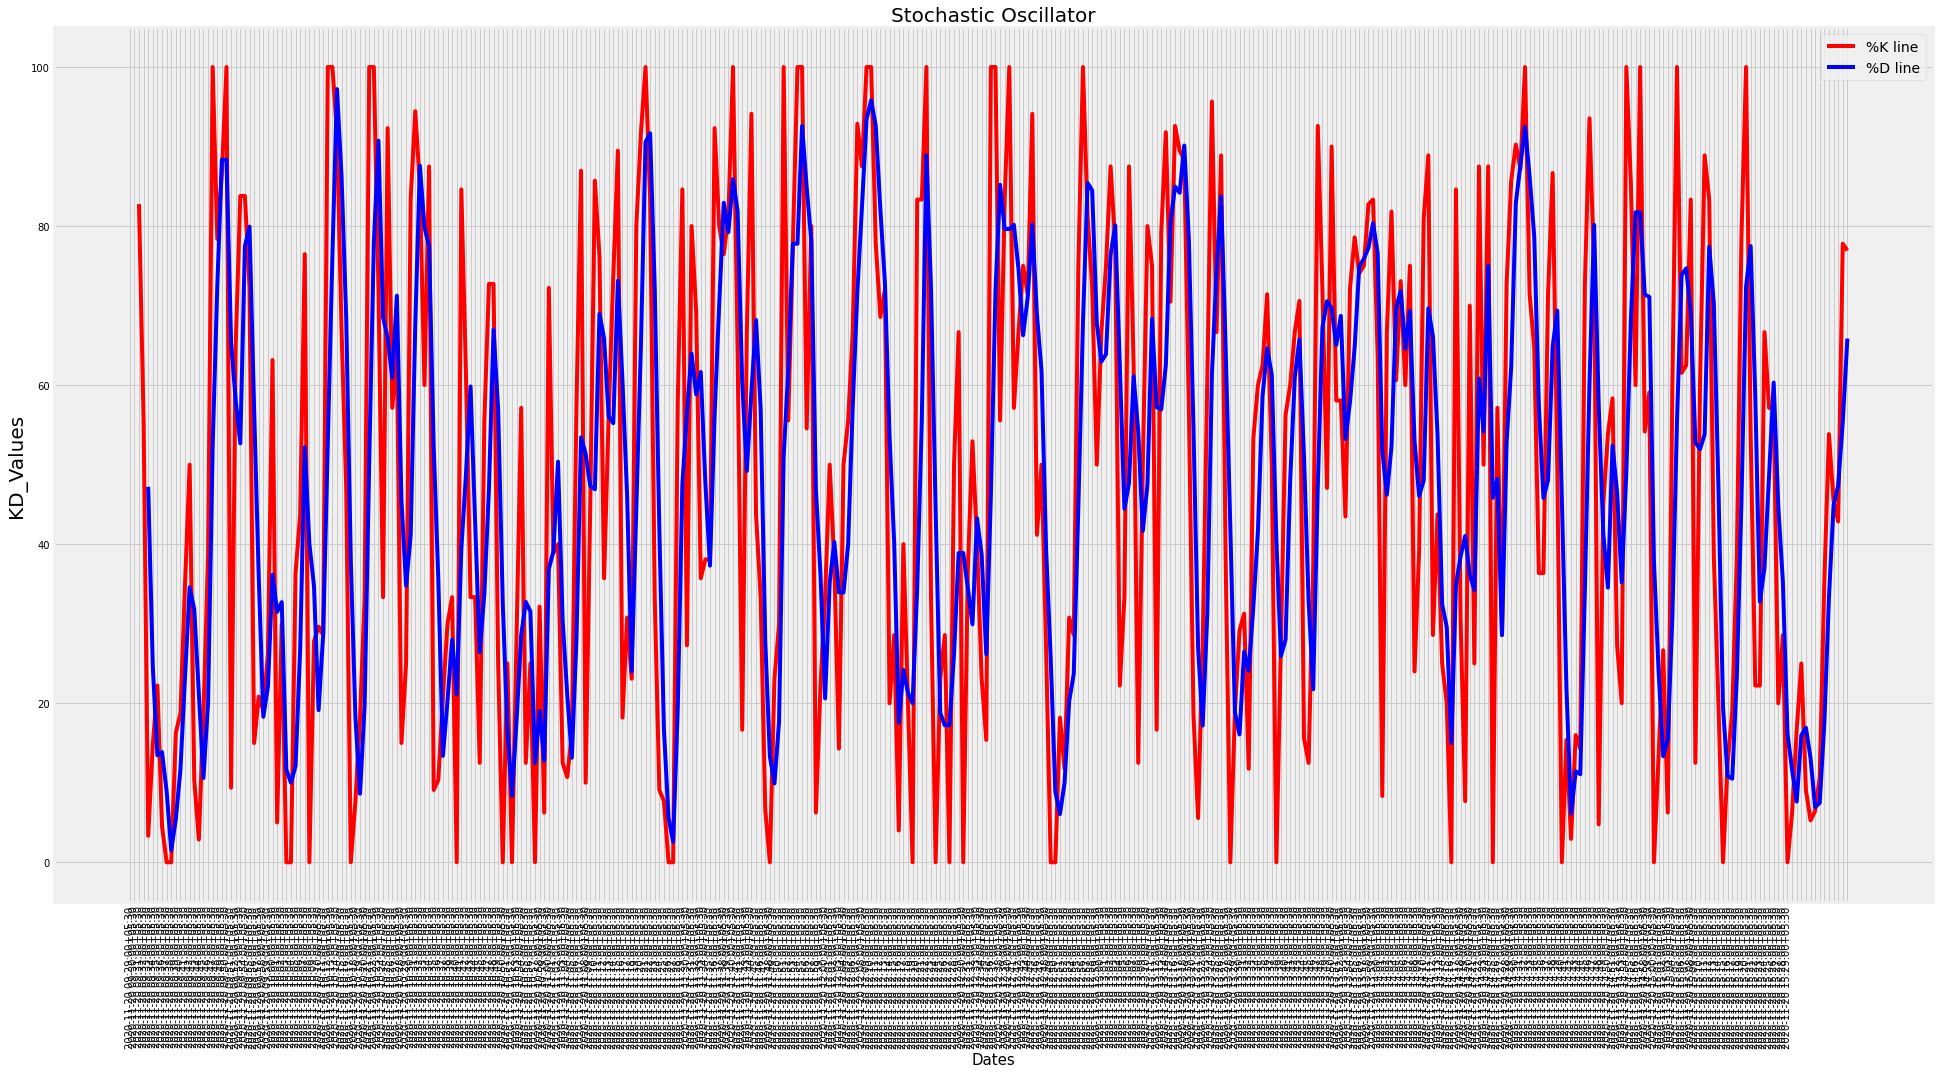

In [42]:
# Visualising the result
plt.figure(figsize=(30,15), facecolor='w', edgecolor='k')
ax = plt.gca() 
plt.plot(STOK,color='red',label = '%K line')
plt.plot(STOD,color='blue',label = '%D line')
plt.title('Stochastic Oscillator', fontsize=20)
#df['date'] = df['date'].reset_index()
x=my_stock.index
labels = np.array(my_stock.index)[13:]
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.ylabel('KD_Values', fontsize=20)
plt.xlabel('Dates', fontsize=15)
plt.legend()
plt.show()

## Calculate Slow %K & Slow %D:

### While Fast Stochastic Oscillator is used for signals, the Slow Stochastic Oscillator is supposed to reflect this emphasis.
* *Slow %K = Fast %K smoothed with 3-period SMA*
<p align="center"> 
<img src="https://static.anychart.com/images/technical_indicators/slowK.png"></p>

In [49]:
# Calculate the Slow K%.
def slow_K():
  slow_STOK = STOK.rolling(n).mean()
  return slow_STOK

Where 3 is a default period for getting slow K.
* *Slow %D = 3-period SMA of Slow %K*
<p align="center"> 
<img src="https://static.anychart.com/images/technical_indicators/slowD.png"></p>

In [50]:
# Calculate the Slow K%.
def slow_D():
  slow_STOD = slow_K().rolling(n).mean()
  return slow_STOD

In [52]:
slow_stok = slow_K()

slow_stod = slow_D()
slow_stod

Datetime
2020-11-20 09:16:00+05:30          NaN
2020-11-20 09:17:00+05:30          NaN
2020-11-20 09:18:00+05:30          NaN
2020-11-20 09:19:00+05:30          NaN
2020-11-20 09:20:00+05:30          NaN
                               ...    
2020-11-20 15:25:00+05:30    19.415811
2020-11-20 15:26:00+05:30    31.878692
2020-11-20 15:27:00+05:30    41.844941
2020-11-20 15:28:00+05:30    49.204172
2020-11-20 15:29:00+05:30    56.199971
Length: 374, dtype: float64

In [53]:

# declare a figure
fig=go.Figure()

fig.add_trace(go.Scatter(x=my_stock.index, y=slow_stok, line=dict(width=1.5, color = 'blue'), name = 'Slow %K'))
fig.add_trace(go.Scatter(x=my_stock.index, y=slow_stod, line=dict(width=1.5, color = 'red'), name = 'Slow %D'))

fig.add_trace(go.Candlestick(x=my_stock.index, open=my_stock['Open'], high=my_stock['High'], low=my_stock['Low'], close=my_stock['Close'], name = 'Market Data'))



fig.show()

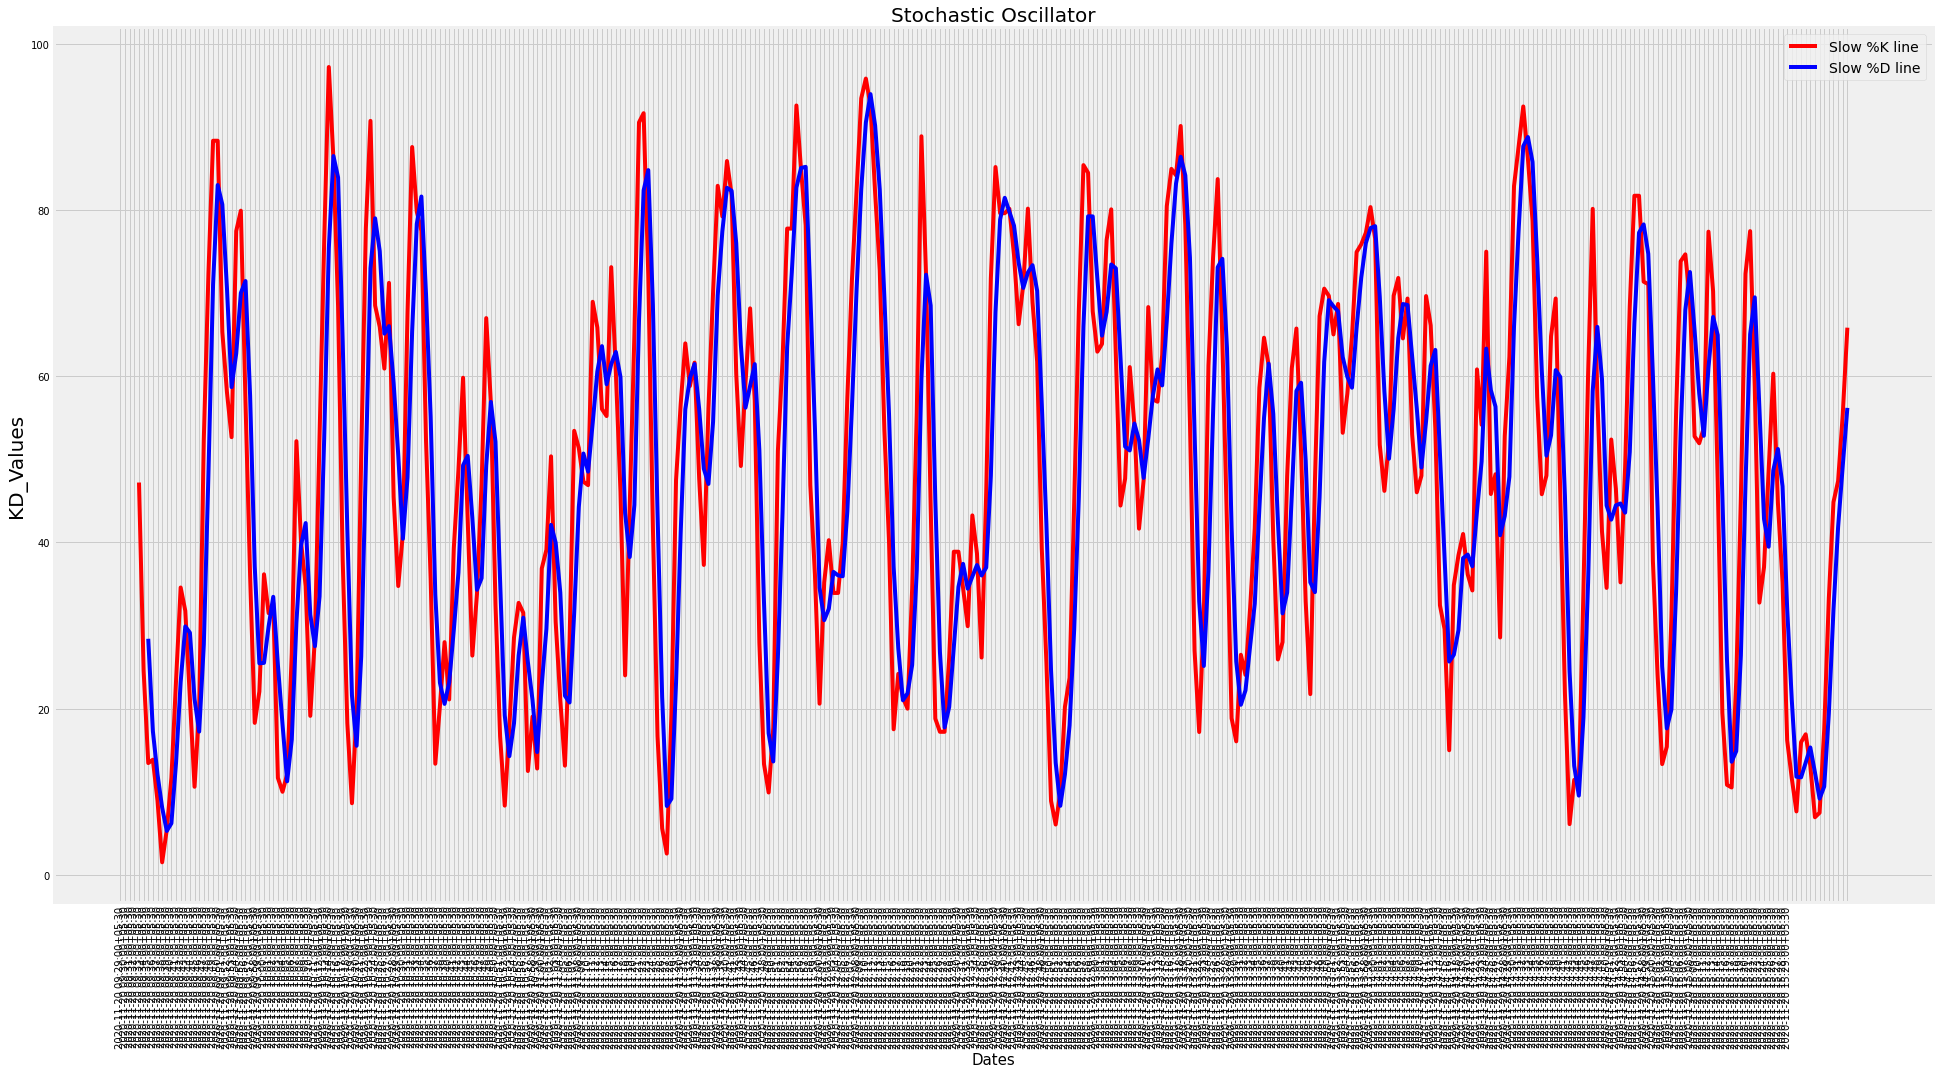

In [55]:
# Visualising the result
plt.figure(figsize=(30,15), facecolor='w', edgecolor='k')
ax = plt.gca() 
plt.plot(slow_stok,color='red',label = 'Slow %K line')
plt.plot(slow_stod,color='blue',label = 'Slow %D line')
plt.title('Stochastic Oscillator', fontsize=20)
#df['date'] = df['date'].reset_index()
x=my_stock.index
labels = np.array(my_stock.index)[13:]
plt.xticks(x, labels, rotation = 'vertical')
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(10)
plt.ylabel('KD_Values', fontsize=20)
plt.xlabel('Dates', fontsize=15)
plt.legend()
plt.show()